In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import sqlite3
import pandas as pd

In [2]:
filename = "ddf_accourdion_v5.0.0_10yrs.db"
runname = filename.replace(".db", "")
con =sqlite3.connect(filename)
df = pd.read_sql("select * from observations where scheduler_note like '%ELAISS%' ;", con)

con.close()

In [3]:
df

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,band,filter,rotSkyPos,rotSkyPos_desired,...,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase,cummTelAz,observation_reason,science_program,cloud_extinction
0,1190,9.380541,-44.004790,60981.334858,60983.319444,30.0,y,y,26.944988,0.0,...,-14.747313,354.346319,-0.763937,45.262296,115.929299,74.828611,-136.159067,FBS,DD,0.0
1,1191,9.380541,-44.004790,60981.335253,60983.319444,30.0,y,y,27.452347,0.0,...,-14.747437,354.351522,-0.761234,45.263538,115.929043,74.831634,-136.159067,FBS,DD,0.0
2,1305,9.370575,-43.964704,60990.032108,60991.086805,30.0,y,y,235.916688,0.0,...,-17.334261,127.556439,22.834687,125.642981,110.128777,57.901531,158.175278,FBS,DD,0.0
3,1306,9.370575,-43.964704,60990.032503,60991.086805,30.0,y,y,237.267926,0.0,...,-17.334370,127.563528,22.833607,125.647406,110.128506,57.898079,158.175278,FBS,DD,0.0
4,1421,9.370575,-43.964704,60990.087126,60990.583333,30.0,r,r,293.410423,0.0,...,-17.349516,128.506948,22.693051,126.238077,110.090862,57.440200,-118.731034,FBS,DD,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21176,2058659,9.374800,-43.886178,64632.195340,64632.611107,30.0,g,g,9.376349,0.0,...,-14.200025,229.290015,-12.500706,112.931613,117.134748,7.395534,-128.841034,FBS,DD,0.0
21177,2058662,9.374800,-43.886178,64632.198980,64632.611107,30.0,i,i,10.216133,0.0,...,-14.201200,229.352844,-12.510983,112.891911,117.132412,7.426488,-127.198836,FBS,DD,0.0
21178,2058663,9.374800,-43.886178,64632.199375,64632.611107,30.0,i,i,11.005483,0.0,...,-14.201328,229.359652,-12.512101,112.887604,117.132159,7.429842,-127.198836,FBS,DD,0.0
21179,2058664,9.374800,-43.886178,64632.201354,64632.611107,30.0,z,z,11.160571,0.0,...,-14.201967,229.393831,-12.517724,112.865965,117.130889,7.446683,-127.198836,FBS,DD,0.0


In [4]:
bins = np.arange(365*2.5, 365*3.5+1, 1) - 0.5


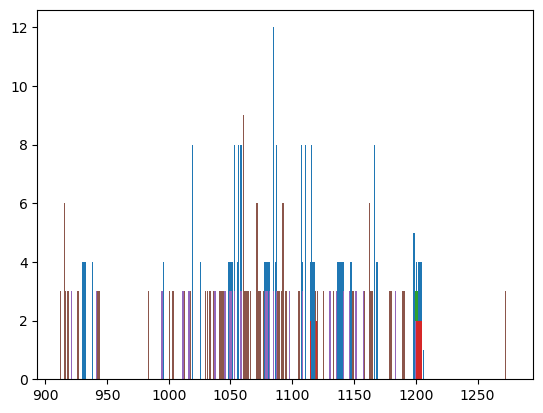

In [5]:

f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}

results = []
colors = []
labels = []
for filtername in f2c:
    good = np.where(df["filter"].values == filtername)[0]
    colors.append(f2c[filtername])
    labels.append(filtername)
    res, _bins, _ack = plt.hist(df["night"].values[good], bins=bins, histtype='bar', stacked=True)

    results.append(res)

In [6]:
ack = np.array(results)
ack.shape

(6, 365)

Text(0.5, 1.0, 'ddf_accourdion_v5.0.0_10yrs\nELAISS1, 905 visits')

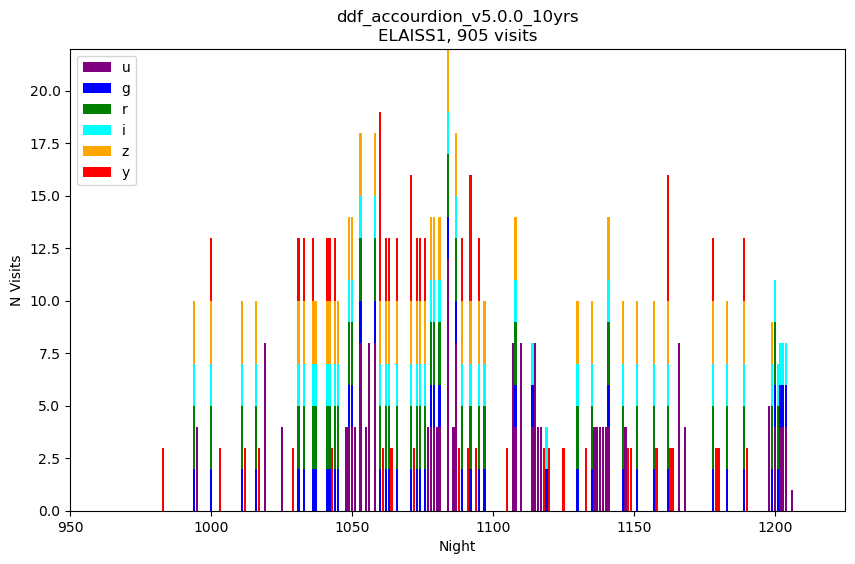

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
bottom = np.zeros(bins.size-1)
running_sum = 0

for i,res in enumerate(results):
    p = ax.bar(bins[:-1], res, bottom=bottom, label=labels[i], color=colors[i])
    bottom += res
    running_sum += np.sum(res)
ax.set_ylabel("N Visits")
ax.set_xlabel("Night")

ax.set_xlim([950, 1225])

ax.legend(loc="upper left")
ax.set_title("%s\nELAISS1, %i visits" % (runname, running_sum))